<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [5]:
# Display summary information: column names, non-null counts, data types, memory usage
print("Dataset Info:\n")
df.info()

# Show data types only
print("\nData Types:\n")
print(df.dtypes)

# Preview first few rows
print("\nFirst 5 Rows:\n")
print(df.head())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Data Types:

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

First 5 Rows:

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 y

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [7]:
# Identify missing values for all columns in the dataset
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

ResponseId
False    65437
Name: count, dtype: int64

MainBranch
False    65437
Name: count, dtype: int64

Age
False    65437
Name: count, dtype: int64

Employment
False    65437
Name: count, dtype: int64

RemoteWork
False    54806
True     10631
Name: count, dtype: int64

Check
False    65437
Name: count, dtype: int64

CodingActivities
False    54466
True     10971
Name: count, dtype: int64

EdLevel
False    60784
True      4653
Name: count, dtype: int64

LearnCode
False    60488
True      4949
Name: count, dtype: int64

LearnCodeOnline
False    49237
True     16200
Name: count, dtype: int64

TechDoc
False    40897
True     24540
Name: count, dtype: int64

YearsCode
False    59869
True      5568
Name: count, dtype: int64

YearsCodePro
False    51610
True     13827
Name: count, dtype: int64

DevType
False    59445
True      5992
Name: count, dtype: int64

OrgSize
False    47480
True     17957
Name: count, dtype: int64

PurchaseInfluence
False    47406
True     18031
Name: count, dtype: 

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [9]:
# Value counts for Employment
print("Employment Distribution:\n")
print(df['Employment'].value_counts(dropna=False))
print("\n" + "="*50 + "\n")

# Value counts for Job Satisfaction
print("JobSat Distribution:\n")
print(df['JobSat'].value_counts(dropna=False))
print("\n" + "="*50 + "\n")

# Value counts for YearsCodePro (professional coding experience)
print("YearsCodePro Distribution:\n")
print(df['YearsCodePro'].value_counts(dropna=False).sort_index())

Employment Distribution:

Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


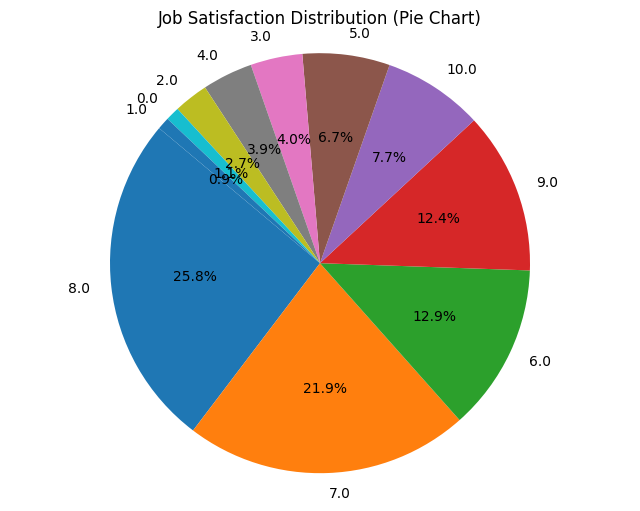

In [11]:
# Value counts
job_sat_counts = df['JobSat'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Satisfaction Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()

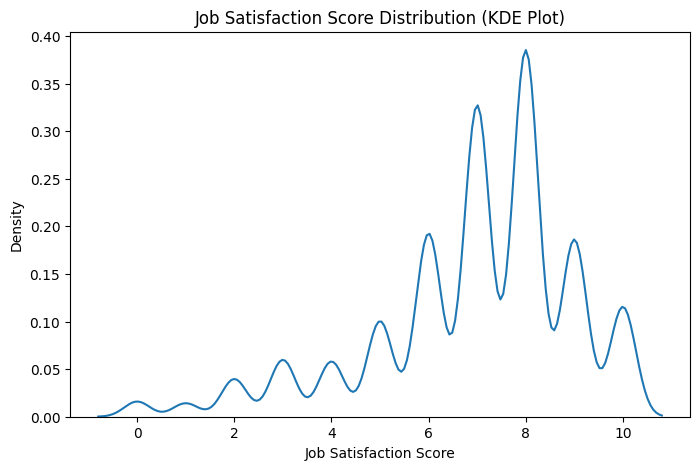

In [17]:
# KDE Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='JobSat')
plt.title('Job Satisfaction Score Distribution (KDE Plot)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [19]:
# View all unique values in the 'LanguageHaveWorkedWith' column
print(f"Unique LanguageHaveWorkedWith Entries: {df['LanguageHaveWorkedWith'].unique()}")

Unique LanguageHaveWorkedWith Entries: [nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript'
 'C#' ...
 'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript'
 'C;C++;Go;Lua;Objective-C;Python;Rust;SQL'
 'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript']


In [22]:
# View all unique values in the 'LanguageWantToWorkWith' column
print(f"Unique LanguageWantToWorkWith Entries: {df['LanguageWantToWorkWith'].unique()}")

Unique LanguageWantToWorkWith Entries: [nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript'
 'C#' ...
 'Bash/Shell (all shells);C;C++;Elixir;Erlang;Go;HTML/CSS;Java;JavaScript;Kotlin;Lua;PowerShell;Python;Rust;Solidity;SQL;TypeScript;VBA;Visual Basic (.Net);Zig'
 'Bash/Shell (all shells);C;C++;Python;Ruby;SQL'
 'Bash/Shell (all shells);C#;Go;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;Python;Rust;SQL;Swift;TypeScript']


In [26]:
# Split and explode 'LanguageHaveWorkedWith'
df_have = df['LanguageHaveWorkedWith'].str.split(';').explode().str.strip()
have_counts = df_have.value_counts().reset_index()
have_counts.columns = ['Language', 'HaveWorkedWith_Count']

# Split and explode 'LanguageWantToWorkWith'
df_want = df['LanguageWantToWorkWith'].str.split(';').explode().str.strip()
want_counts = df_want.value_counts().reset_index()
want_counts.columns = ['Language', 'WantToWorkWith_Count']

# Merge both counts
language_comparison = pd.merge(have_counts, want_counts, on='Language', how='outer').fillna(0)

# Convert counts to integers
language_comparison['HaveWorkedWith_Count'] = language_comparison['HaveWorkedWith_Count'].astype(int)
language_comparison['WantToWorkWith_Count'] = language_comparison['WantToWorkWith_Count'].astype(int)

# Sort by 'WantToWorkWith' descending
language_comparison = language_comparison.sort_values(by='WantToWorkWith_Count', ascending=False)

# Display result for comparision
print(language_comparison)

                   Language  HaveWorkedWith_Count  WantToWorkWith_Count
36                   Python                 30719                 25047
22               JavaScript                 37492                 23774
40                      SQL                 30682                 22400
19                 HTML/CSS                 31816                 20721
44               TypeScript                 23150                 20239
39                     Rust                  7559                 17232
17                       Go                  8103                 13837
3   Bash/Shell (all shells)                 20412                 13744
5                        C#                 16318                 12921
6                       C++                 13827                 10873
21                     Java                 18239                 10668
4                         C                 12184                  8275
24                   Kotlin                  5665               

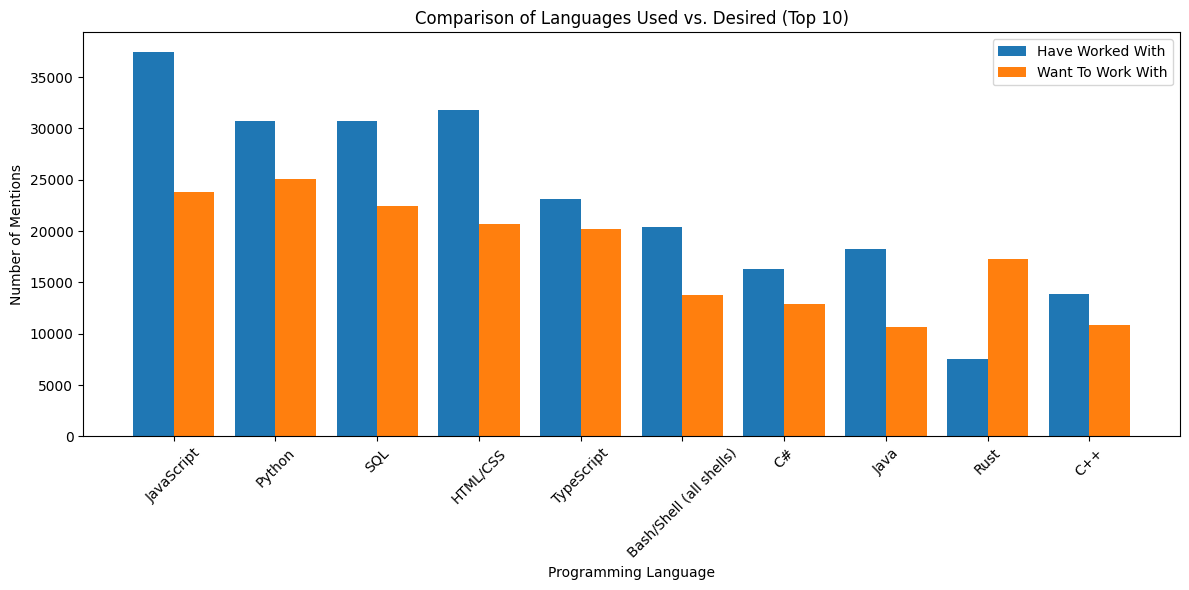

In [30]:
import numpy as np

# Select top 10 languages by total mentions (combined)
language_comparison['Total'] = (
    language_comparison['HaveWorkedWith_Count'] + language_comparison['WantToWorkWith_Count']
)
top_langs = language_comparison.sort_values(by='Total', ascending=False).head(10)

# Set bar width and positions
x = np.arange(len(top_langs))
bar_width = 0.4

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, top_langs['HaveWorkedWith_Count'], width=bar_width, label='Have Worked With')
plt.bar(x + bar_width/2, top_langs['WantToWorkWith_Count'], width=bar_width, label='Want To Work With')

plt.xticks(x, top_langs['Language'], rotation=45)
plt.xlabel('Programming Language')
plt.ylabel('Number of Mentions')
plt.title('Comparison of Languages Used vs. Desired (Top 10)')
plt.legend()
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [38]:
# View all unique values in the 'RemoteWork' column
print(f"Unique RemoteWork Entries: {df['RemoteWork'].unique()}")

Unique RemoteWork Entries: ['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']


In [40]:
# View all unique values in the 'Country' column
print(f"Unique Country Entries: {df['Country'].unique()}")

Unique Country Entries: ['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhsta

In [42]:
# Define a mapping dictionary for Country column
country_mapping = {
    "United States of America": 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    "Lao People's Democratic Republic": 'Laos',
    "Democratic People's Republic of Korea": 'South Korea',
    'Congo, Republic of the...': 'Congo',
    'Micronesia, Federated States of...': 'Micronesia',
    'NaN': pd.NA
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

In [44]:
# Group by Country and RemoteWork, then count
remoteWork_country = df.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')

# Sort and view remote work preference per country
remoteWork_per_country = remoteWork_country.sort_values(['Country', 'Count'], ascending=[True, False])

# Display result
print(remoteWork_per_country)

         Country                            RemoteWork  Count
0    Afghanistan  Hybrid (some remote, some in-person)     17
1    Afghanistan                             In-person     13
2    Afghanistan                                Remote     10
3        Albania  Hybrid (some remote, some in-person)     14
5        Albania                                Remote     14
..           ...                                   ...    ...
468       Zambia  Hybrid (some remote, some in-person)      4
470       Zambia                                Remote      3
471     Zimbabwe  Hybrid (some remote, some in-person)      8
472     Zimbabwe                             In-person      6
473     Zimbabwe                                Remote      6

[474 rows x 3 columns]


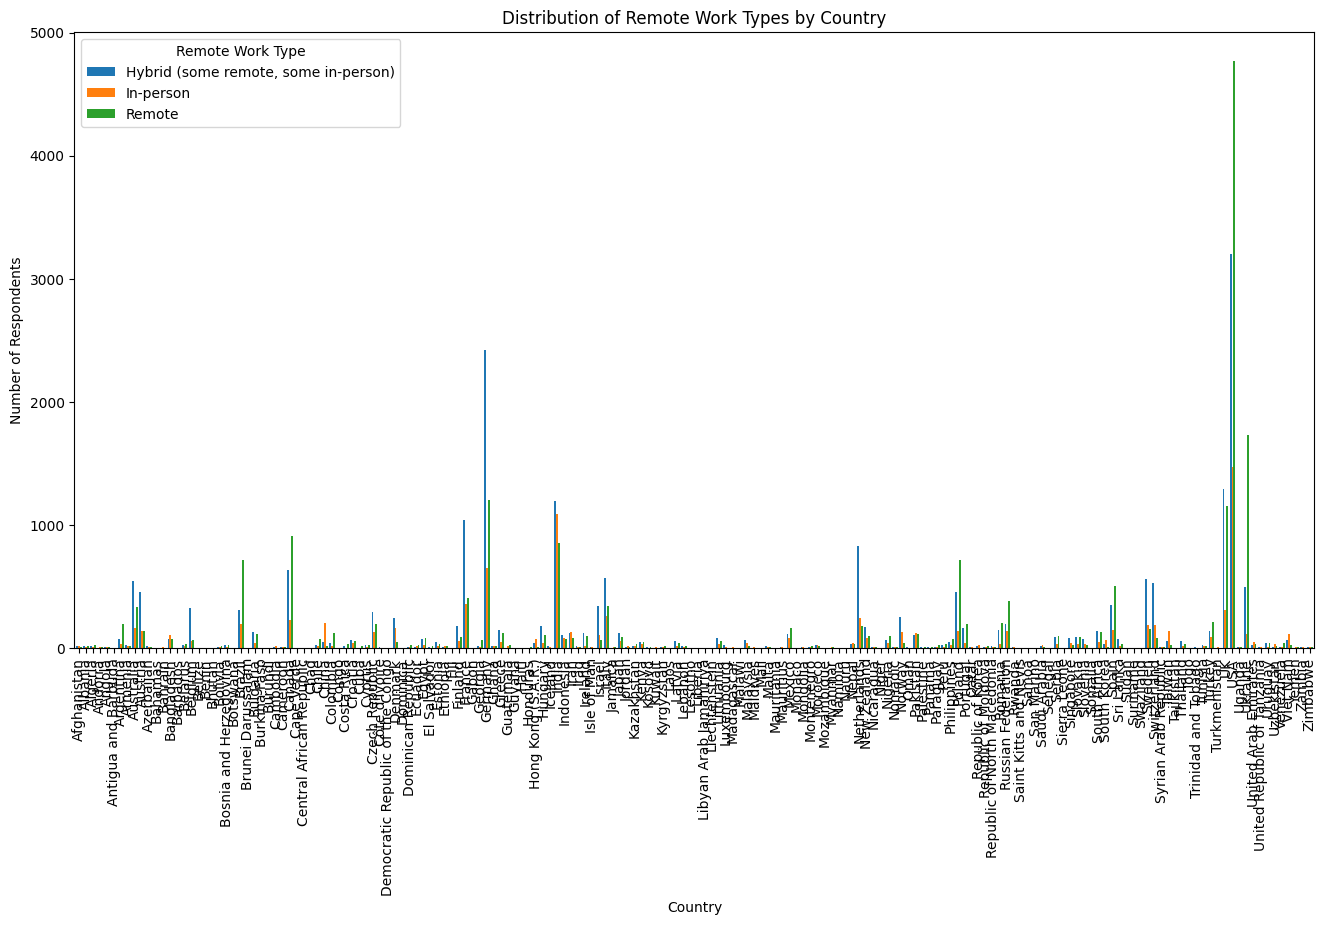

In [60]:
# Pivot the data: rows = Country, columns = RemoteWork types, values = Count
pivot_df = remoteWork_per_country.pivot(index='Country', columns='RemoteWork', values='Count').fillna(0)

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(16, 8), width=0.8)

plt.title('Distribution of Remote Work Types by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.legend(title='Remote Work Type')
plt.show()

In [70]:
# Filter only rows where RemoteWork type is 'Remote'
remote_only = remoteWork_per_country[remoteWork_per_country['RemoteWork'] == 'Remote']

# Sort by Count descending and get top 10 countries
top_10_remote = remote_only.sort_values(by='Count', ascending=False).head(10)

# Display the result
print("Top 10 Countries by Remote Work Count:")
print(top_10_remote)

Top 10 Countries by Remote Work Count:
     Country RemoteWork  Count
440      USA     Remote   4766
446  Ukraine     Remote   1733
153  Germany     Remote   1202
437       UK     Remote   1152
81    Canada     Remote    907
180    India     Remote    853
334   Poland     Remote    714
64    Brazil     Remote    714
393    Spain     Remote    504
146   France     Remote    409


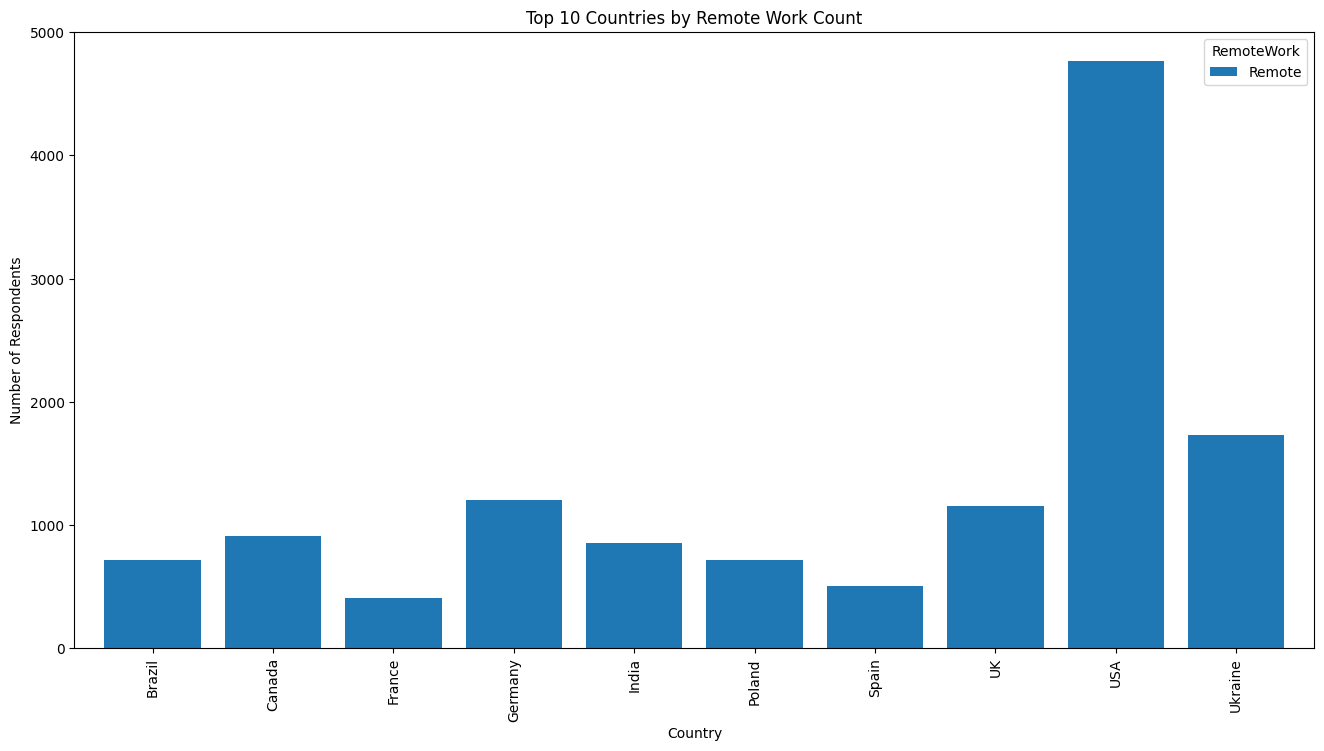

In [72]:
# Pivot the data: rows = Country, columns = RemoteWork types, values = Count
pivot_df2 = top_10_remote.pivot(index='Country', columns='RemoteWork', values='Count').fillna(0)

# Plot grouped bar chart
pivot_df2.plot(kind='bar', figsize=(16, 8), width=0.8)

plt.title('Top 10 Countries by Remote Work Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [76]:
df['JobSat'].unique()
df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [78]:
# Convert 'Less than 1 year' or 'More than 50 years'to numbers
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

In [80]:
df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3', '0.5', '18',
       '37', '15', '20', '6', '2', '16', '8', '14', '4', '45', '1', '24',
       '29', '5', '30', '26', '9', '33', '13', '35', '23', '22', '31',
       '19', '21', '28', '34', '32', '40', '50', '39', '44', '42', '41',
       '36', '38', '51', '43', '47', '48', '46', '49'], dtype=object)

In [84]:
from scipy.stats import pearsonr, spearmanr

# convert data to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop missing values in relevant columns
df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Calculate Pearson correlation
pearson_corr, pearson_p = pearsonr(df_cleaned['YearsCodePro'], df_cleaned['JobSat'])

# Calculate Spearman correlation
spearman_corr, spearman_p = spearmanr(df_cleaned['YearsCodePro'], df_cleaned['JobSat'])

# Output results
print(f"Pearson Correlation: {pearson_corr:.3f} (p-value={pearson_p:.3g})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p-value={spearman_p:.3g})")

Pearson Correlation: 0.104 (p-value=2.94e-69)
Spearman Correlation: 0.119 (p-value=3.07e-90)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [86]:
df['Employment'].unique()

array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

In [88]:
# Define priority order (most stable job types first)
employment_priority = [
    'Employed, full-time',
    'Employed, part-time',
    'Independent contractor, freelancer, or self-employed',
    'Student, full-time',
    'Student, part-time',
    'Not employed, but looking for work',
    'Not employed, and not looking for work',
    'Retired',
    'I prefer not to say'
]

# Function to extract primary employment type
def extract_primary_employment(entry):
    if pd.isnull(entry):
        return 'Unknown'
    roles = [r.strip() for r in entry.split(';')]
    for role in employment_priority:
        if role in roles:
            return role
    return 'Other'

# Apply the transformation
df['PrimaryEmployment'] = df['Employment'].apply(extract_primary_employment)

In [90]:
df['PrimaryEmployment'].unique()

array(['Employed, full-time', 'Student, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work', 'Employed, part-time',
       'I prefer not to say', 'Not employed, but looking for work',
       'Student, part-time', 'Retired'], dtype=object)

In [92]:
df['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [94]:
# Define a mapping dictionary for EdLevel column
EdLevel_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional degree",
    "Associate degree (A.A., A.S., etc.)": 'Associate degree',
    'NaN': pd.NA
}

# Apply the mapping
df['EdLevel'] = df['EdLevel'].replace(EdLevel_mapping)

In [96]:
# Cross-tabulate EdLevel vs Employment
edu_employment_ct = pd.crosstab(df['EdLevel'], df['PrimaryEmployment'])

# Display cross-tab
print(f"Cross-tabulation of Education Level and Employment Type: {edu_employment_ct}")

Cross-tabulation of Education Level and Employment Type: PrimaryEmployment                                   Employed, full-time  \
EdLevel                                                                   
Associate degree                                                   1260   
Bachelor’s degree                                                 19136   
Master’s degree                                                   12489   
Primary/elementary school                                           201   
Professional degree                                                2312   
Secondary school                                                   1860   
Some college/university study without earning a...                 4494   
Something else                                                      448   

PrimaryEmployment                                   Employed, part-time  \
EdLevel                                                                   
Associate degree                          

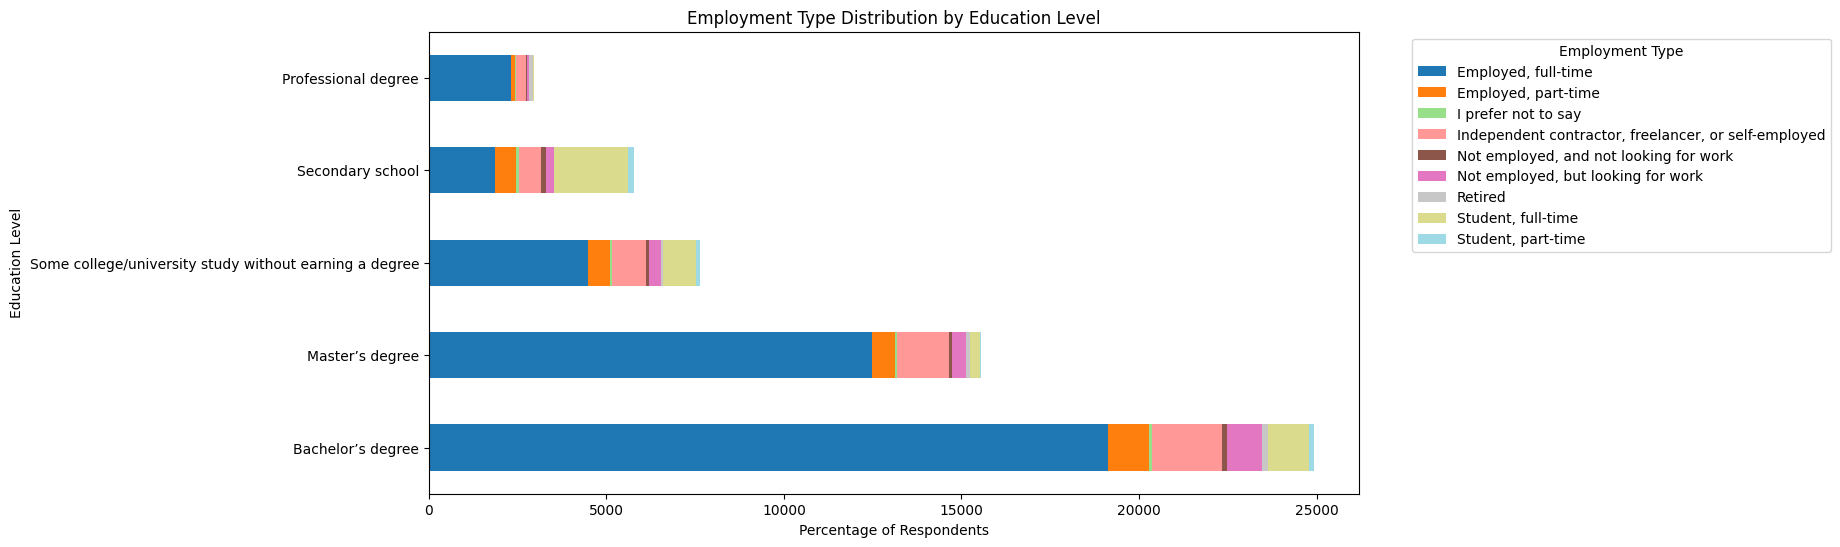

In [100]:
# Plot as a stacked bar chart
edu_employment_pct_sorted = edu_employment_ct.loc[edu_employment_ct.sum(axis=1).sort_values(ascending=False).index[:5]]

edu_employment_pct_sorted.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Education Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [102]:
df.to_csv("modified_survey_data2.csv", index=False)
print("Dataset saved successfully as 'modified_survey_data2.csv'")

Dataset saved successfully as 'modified_survey_data2.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
